# Inaugural Project 1

# Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2


# Question 1

We followed these steps:
    Defined the parameters given in the exercise
    Wrote up the utility function
    Wrote up the initial utility
    Settings for figure
    Plot of the endowment
    Plot the edgeworth box and the pareto improvements 

The Edgeworth Box itself, marked by black lines, represents all possible allocations of two goods (or resources) x1 and x2 between two parties, A and B. The dimensions of the box are determined by the total amount of each good available, w_1\bar and w_2\bar, both set to 1.0 in this scenario.

The initial endowment of party A is represented by a black square marker. This point indicates the starting allocation of goods between the two parties, with A starting with 0.8 of x1 and 0.3 of x2.

The Pareto improvements are shown as blue dots. These are allocations where both parties' utilities are at least as high as their utilities at the initial endowment, indicating that both parties are better off (or at least not worse off) compared to their initial positions. The utility functions for A and B (uAuA and uBuB) are based on Cobb-Douglas preferences, with parameters αα and ββ determining the weight each party places on goods x1 and x2.


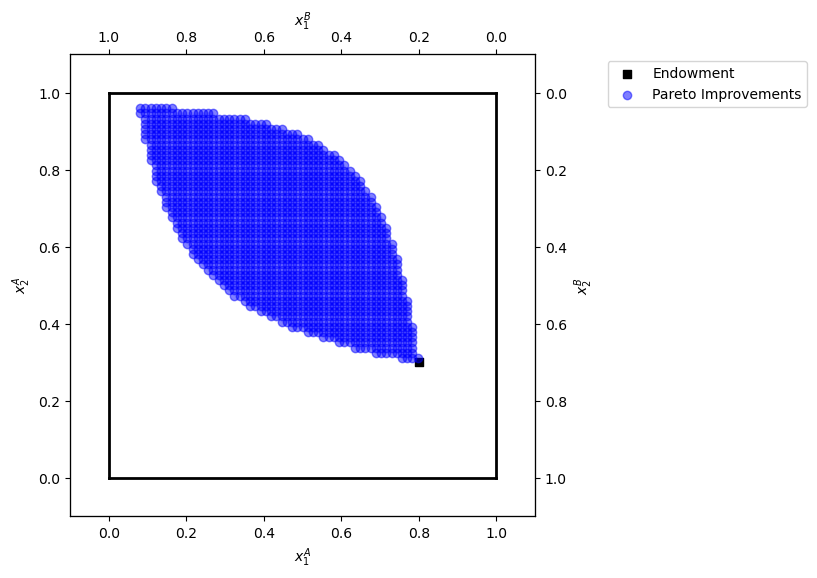

In [25]:
# Parameters
alpha = 1/3
beta = 2/3
N = 75  # Grid size for the plot
omega_A1 = 0.8
omega_A2 = 0.3
w1bar = 1.0
w2bar = 1.0

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(w1bar - omega_A1, w2bar - omega_A2)

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment
ax_A.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment')

# Plotting Edgeworth Box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Calculating and plotting the Pareto improvements
x_A1 = np.linspace(0, w1bar, N)
x_A2 = np.linspace(0, w2bar, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

U_A = uA(X_A1, X_A2)
U_B = uB(w1bar-X_A1, w2bar-X_A2)

pareto_improvement_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

ax_A.scatter(X_A1[pareto_improvement_mask], X_A2[pareto_improvement_mask], color='blue', alpha=0.5, label='Pareto Improvements')

# Adjusting limits and showing plot
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()

# Question 2

We use the following steps in the code:
1.	Define parameters and endowment
2.	Define price range for p1
3.	Define demand function for consumer A and B
4.	Calculate the errors for the market clearing conditions. 

The code calculates and displays the errors in the market clearing conditions for two goods across a range of prices for the first good (p1), while treating the price of the second good (p2) as the numeraire (fixed at 1). The errors are calculated based on the demand functions for consumers A and B, given their initial endowments and preferences (represented by α and β), and a range of prices for good 1 (p1) from 0,5 to 2,5.

The output shows the errors in the market clearing conditions for the first five price levels in the specified range. Each row in the output corresponds to a specific price of p1, with the first column representing the error in the market for good 1 (ϵ1) and the second column for good 2 (ϵ2). The errors represent the difference between the total demanded quantities of each good and the total endowments in the economy for those goods. Positive values indicate excess demand, while negative values indicate excess supply.

From the first five rows, we can observe a pattern:
•	The error for good 1 (ϵ1) is positive in all cases, suggesting excess demand for good 1 across these price levels.
•	The error for good 2 (ϵ2) is negative, indicating excess supply for good 2 at these price levels.
This outcome suggests that, within the examined price range for p1, there's consistently more demand for good 1 than is available from the initial endowments, while the opposite is true for good 2. 


In [45]:
# Given parameters and initial endowments

omega1_B = 1 - omega1_A
omega2_B = 1 - omega2_A
p2 = 1  # Numeraire

# Define the price range for p1
N = 75
p1_range = np.linspace(0.5, 2.5, N)

# Demand functions for consumer A and B
def demand_A(p1, omega1_A, omega2_A, alpha, p2=1):
    xA1 = alpha * (omega1_A * p1 + omega2_A * p2) / p1
    xA2 = (1 - alpha) * (omega1_A * p1 + omega2_A * p2) / p2
    return xA1, xA2

def demand_B(p1, omega1_B, omega2_B, beta, p2=1):
    xB1 = beta * (omega1_B * p1 + omega2_B * p2) / p1
    xB2 = (1 - beta) * (omega1_B * p1 + omega2_B * p2) / p2
    return xB1, xB2

# Calculate the errors for the market clearing conditions
errors = np.zeros((N, 2))  # Store errors for epsilon1 and epsilon2
for i, p1 in enumerate(p1_range):
    xA1, xA2 = demand_A(p1, omega1_A, omega2_A, alpha)
    xB1, xB2 = demand_B(p1, omega1_B, omega2_B, beta)
    
    epsilon1 = xA1 + xB1 - (omega1_A + omega1_B)
    epsilon2 = xA2 + xB2 - (omega2_A + omega2_B)
    
    errors[i] = [epsilon1, epsilon2]

# Display the first 5 rows of errors as a sample
print(errors[:5])

[[ 0.53333333 -0.26666667]
 [ 0.47521368 -0.25045045]
 [ 0.42276423 -0.23423423]
 [ 0.3751938  -0.21801802]
 [ 0.33185185 -0.2018018 ]]


# Question 3

Follow these steps:
1. Defines the given parameters, including the initial endowments and the utility function for consumer A.

2. Implements the demand functions for both consumers A and B based on their endowments and the prices of goods.

3. Defines an objective function that represents consumer A's utility as a function of the price of good 1 (p1), which consumer A seeks to maximize.

4. Uses the minimize_scalar function from scipy.optimize to find the optimal price of good 1 (p1) that maximizes consumer A's utility, within the given bounds. In this context, we use the bounded method with bounds set to allow p1 to vary freely in positive space.

5. Outputs the optimal market-clearing price for good 1 (p1) that aligns with consumer A's utility maximization.

This code finds the market clearing price p1 by minimizing the sum of the absolute values of the market clearing condition errors. It uses the minimize_scalar function from scipy.optimize with a bounded method, since the price p1 is expected to be within a specific range.

The market-clearing price p1 has been found to be approximately 0.9444. At this price:

Consumer A demands approximately 0.37255 of good 1 and 0.70370 of good 2.
Consumer B demands approximately 0.62745 of good 1 and 0.29630 of good 2.

We know that the price above is the market clearing price, since Walras' law state that if one market clears, the other one does as well. 


In [2]:
import numpy as np
from scipy.optimize import minimize_scalar

# Parameters
alpha = 1/3
beta = 2/3
omega_A = np.array([0.8, 0.3])
omega_B = 1 - omega_A
p2 = 1  # Given numeraire

# Utility functions
def uA(x1, x2, alpha=alpha):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2, beta=beta):
    return x1**beta * x2**(1-beta)

# Demand functions for consumers A and B
def demand_A(p1, omega_A=omega_A, alpha=alpha, p2=p2):
    xA1 = alpha * (p1*omega_A[0] + p2*omega_A[1]) / p1
    xA2 = (1-alpha) * (p1*omega_A[0] + p2*omega_A[1]) / p2
    return np.array([xA1, xA2])

def demand_B(p1, omega_B=omega_B, beta=beta, p2=p2):
    xB1 = beta * (p1*omega_B[0] + p2*omega_B[1]) / p1
    xB2 = (1-beta) * (p1*omega_B[0] + p2*omega_B[1]) / p2
    return np.array([xB1, xB2])

# Simulate market clearing for a range of p1 values
p1_range = np.linspace(0.5, 2.5, 1000)

# Market clearing condition errors calculation
def market_clearing_errors(p1):
    xA = demand_A(p1)
    xB = demand_B(p1)
    epsilon1 = xA[0] + xB[0] - (omega_A[0] + omega_B[0])
    epsilon2 = xA[1] + xB[1] - (omega_A[1] + omega_B[1])
    return abs(epsilon1) + abs(epsilon2)

# Find the p1 that minimizes the market clearing condition errors
errors = np.array([market_clearing_errors(p1) for p1 in p1_range])
index_min_error = np.argmin(errors)
p1_star = p1_range[index_min_error]

# Calculate demands at the market clearing price
demand_A_star = demand_A(p1_star)
demand_B_star = demand_B(p1_star)

p1_star, demand_A_star, demand_B_star

(0.9444444444444444,
 array([0.37254902, 0.7037037 ]),
 array([0.62745098, 0.2962963 ]))

# Question 4a

We follow the following steps to generate the values we are looking for:
1.	Define the necessary parameters for the model.
2.	Generate a list of possible prices P1 within the specified interval.
3.	Define the utility function for consumer A, as well as the demand functions based on the given formulas.
4.	Calculate the utility value uA for each price in P1 by applying the demand functions and the utility function and save these values.
5.	Find the maximum value of uA and the price p1 that provides this maximum utility.
6.	Apply the demand functions with this optimal price to find the specific distribution of good 1 and good 2 that maximizes consumer A's utility.

By applying the optimal price p1=0.5, we find that the distribution of good 1 and good 2 for consumer A is approximately 0.63 and 0.63, respectively. This means that consumer A achieves their maximum utility by consuming almost equal amounts of good 1 and good 2 when the price of good 1 is set to 0.5. The distribution for consumer B is 0,73 of good 1 and 0,18 of good 2.

In [3]:
import numpy as np

# Given parameters
alpha = 1/3
beta = 2/3
omega_1A = 0.8
omega_2A = 0.3
p2 = 1  # Numeraire
N = 75
P1 = np.linspace(0.5, 2.5, N)

# Utility function for consumer A
def uA(x1, x2, alpha=alpha):
    return x1**alpha * x2**(1-alpha)

# Demand function for consumer A
def demand_A(p1, omega_1A=omega_1A, omega_2A=omega_2A, alpha=alpha, p2=p2):
    xA1_star = alpha * ((omega_1A + p1/p2*omega_2A) / p1)
    xA2_star = (1-alpha) * ((omega_1A + p1/p2*omega_2A) / p2)
    return xA1_star, xA2_star

# Utility and demand functions for consumer B (assuming these are similar to A's for demonstration)
def uB(x1, x2, beta=beta):
    return x1**beta * x2**(1-beta)

def demand_B(p1, omega_1B=1-omega_1A, omega_2B=1-omega_2A, beta=beta, p2=p2):
    xB1_star = beta * ((omega_1B + p1/p2*omega_2B) / p1)
    xB2_star = (1-beta) * ((omega_1B + p1/p2*omega_2B) / p2)
    return xB1_star, xB2_star

# Calculate uA for each price p1 and store the result
uA_values = [uA(*demand_A(p1_i)) for p1_i in P1]

# Find the maximum value of uA and the corresponding price p1
max_uA = max(uA_values)
max_uA_index = uA_values.index(max_uA)
max_p1 = P1[max_uA_index]

# Use the demand functions with the optimal price p1 to find the distribution of good 1 and good 2 for consumer A
xA1_star, xA2_star = demand_A(max_p1)

# Calculate the distribution for consumer B using the optimal p1
xB1_star, xB2_star = demand_B(max_p1)

# Output the results
print(f"Maximum uA: {max_uA}, at p1: {max_p1}")
print(f"Consumer A's distribution - Good 1: {xA1_star}, Good 2: {xA2_star}")
print(f"Consumer B's distribution - Good 1: {xB1_star}, Good 2: {xB2_star}")

Maximum uA: 0.6333333333333333, at p1: 0.5
Consumer A's distribution - Good 1: 0.6333333333333333, Good 2: 0.6333333333333334
Consumer B's distribution - Good 1: 0.7333333333333332, Good 2: 0.18333333333333332


# Question 4b

The resolution of exercise 4b, where consumer A is allowed to choose any positive price p1 to maximize her utility under the condition that consumer B's utility is not diminished compared to their initial endowment, produces following outcome outcomes:

The optimal price p1 was found to be approximately 1.9639. At this price, consumer A achieves an optimal utility of about 0.6982, reflecting a favorable situation for her within the given constraints.

The allocation of goods between the two consumers at this price point reveals that consumer A will consume approximately 0.6945 of good 1 and 0.7000 of good 2, indicating a significant share of both goods leaning towards consumer A's preference. Conversely, consumer B is allocated about 0.3055 of good 1 and 0.3000 of good 2, ensuring that consumer B's utility is maintained at least at the level of their initial endowment, fulfilling the market maker's constraint.

In [4]:
from scipy.optimize import minimize

# Utility functions
def uA(x1, x2, alpha=1/3):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2, beta=2/3):
    return x1**beta * x2**(1-beta)

# Initial endowments
omega_A = np.array([0.8, 0.3])
omega_B = np.array([0.2, 0.7])

# Initial utilities
initial_uA = uA(omega_A[0], omega_A[1])
initial_uB = uB(omega_B[0], omega_B[1])

# Objective function to maximize A's utility
def objective(p1, return_neg=True):
    xB1, xB2 = demand_B(p1)
    xA1, xA2 = 1 - xB1, 1 - xB2
    if uB(xB1, xB2) >= initial_uB:
        if return_neg:
            return -uA(xA1, xA2)  # Negative because we're minimizing
        else:
            return uA(xA1, xA2)
    else:
        return np.inf

# Constraint to ensure p1 > 0
constraints = ({'type': 'ineq', 'fun': lambda p1: p1})

# Optimization over p1
result = minimize(fun=objective, x0=np.array([1]), bounds=[(0.01, np.inf)], constraints=constraints)

if result.success:
    optimal_p1 = result.x[0]
    optimal_uA = objective(optimal_p1, return_neg=False)
    optimal_xB1, optimal_xB2 = demand_B(optimal_p1)
    optimal_xA1, optimal_xA2 = 1 - optimal_xB1, 1 - optimal_xB2

    print(f"Optimal p1: {optimal_p1:.4f}")
    print(f"Optimal utility for A: {optimal_uA:.4f}")
    print(f"Optimal allocation for A: Good 1: {optimal_xA1:.4f}, Good 2: {optimal_xA2:.4f}")
    print(f"Optimal allocation for B: Good 1: {optimal_xB1:.4f}, Good 2: {optimal_xB2:.4f}")
else:
    print("Optimization was unsuccessful.")

Optimal p1: 0.7720
Optimal utility for A: 0.5892
Optimal allocation for A: Good 1: 0.3606, Good 2: 0.7532
Optimal allocation for B: Good 1: 0.6394, Good 2: 0.2468


# Question 5a
To answer this question we go through the following steps:
1. Define the utility functions.
2. Use the utility functions to calculate the initial utilities.
3. Enumerate C, i.e. Generate the set C by finding all combinations of xA1 and xA2 (within the given discrete range) that do not decrease the utilities of A and B from their initial levels.
4. Maximize A's Utility: Iterate over the set C to find the combination of xA1 and xA2 that maximizes A's utility, subject to the constraint that B's utility is not less than its initial level.

In [29]:

# Utility functions
def u_A(x_A1, x_A2, alpha=alpha):
    return x_A1**alpha * x_A2**(1-alpha)

def u_B(x_B1, x_B2, beta=beta):
    return x_B1**beta * x_B2**(1-beta)

# Initial utilities
u_A_initial = u_A(omega_A1, omega_A2)
u_B_initial = u_B(omega_B1, omega_B2)

# Objective function to maximize A's utility, negative for minimization
def objective(x):
    x_A1, x_A2 = x
    return -u_A(x_A1, x_A2)

# Constraints for Pareto improvement
constraints = (
    {'type': 'ineq', 'fun': lambda x: u_A(x[0], x[1]) - u_A_initial},  # A at least as well off
    {'type': 'ineq', 'fun': lambda x: u_B(1-x[0], 1-x[1]) - u_B_initial},  # B at least as well off
    {'type': 'ineq', 'fun': lambda x: x[0]},  # x_A1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]},  # x_A2 >= 0
    {'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # x_A1 <= 1
    {'type': 'ineq', 'fun': lambda x: 1 - x[1]}   # x_A2 <= 1
)

# Initial guess
x0 = [omega_A1, omega_A2]

# Perform the optimization
result = minimize(objective, x0, constraints=constraints)

# Extract the optimal allocation
x_A1_opt, x_A2_opt = result.x

x_A1_opt, x_A2_opt, -result.fun

/var/folders/dd/41tnfy016dn2kydbqq3sbsg40000gn/T/ipykernel_26187/1686884273.py:6: RuntimeWarning: invalid value encountered in scalar power
  return x_B1**beta * x_B2**(1-beta)


(0.7000000011041209, 1.0, 0.8879040022094357)

# Question 5b

In [30]:
# Constraints for B being at least as well off, without restrictions on A's choice set
constraints_5b = (
    {'type': 'ineq', 'fun': lambda x: u_B(1-x[0], 1-x[1]) - u_B_initial},  # B at least as well off
    {'type': 'ineq', 'fun': lambda x: x[0]},  # x_A1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]},  # x_A2 >= 0
    {'type': 'ineq', 'fun': lambda x: 1 - x[0]},  # x_A1 <= 1
    {'type': 'ineq', 'fun': lambda x: 1 - x[1]}   # x_A2 <= 1
)

# Perform the optimization with new constraints for 5b
result_5b = minimize(objective, x0, constraints=constraints_5b)

# Extract the optimal allocation for 5b
x_A1_opt_5b, x_A2_opt_5b = result_5b.x

x_A1_opt_5b, x_A2_opt_5b, -result_5b.fun

/var/folders/dd/41tnfy016dn2kydbqq3sbsg40000gn/T/ipykernel_26187/1686884273.py:6: RuntimeWarning: invalid value encountered in scalar power
  return x_B1**beta * x_B2**(1-beta)


(0.7000000011041209, 1.0, 0.8879040022094357)

# Question 6a

In [31]:

# Utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

# Objective function: Maximizing the sum of utilities of A and B
def objective(x):
    xA1, xA2 = x
    xB1, xB2 = 1 - xA1, 1 - xA2
    return -(uA(xA1, xA2) + uB(xB1, xB2))  # Negative because we minimize

# Initial guess
x0 = np.array([0.5, 0.5])

# Bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Optimization
result = minimize(objective, x0, bounds=bounds, method='SLSQP')

# Display the resulting allocation
result.x


array([0.33341166, 0.66658831])

# Question 6b

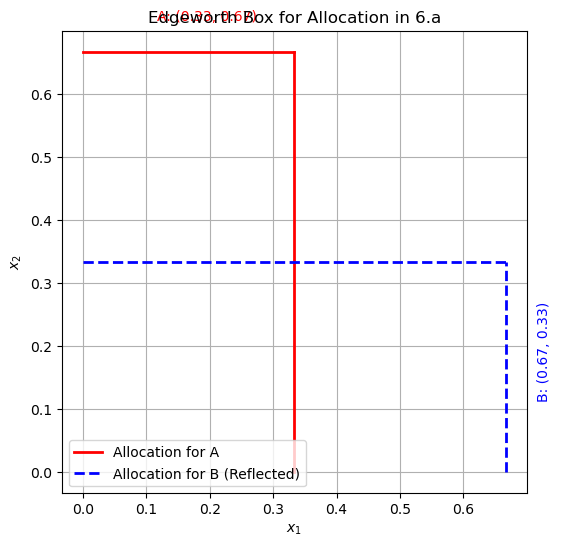

In [32]:
# Allocation from 6.a
xA1, xA2 = result.x
xB1, xB2 = 1 - xA1, 1 - xA2

# Create the Edgeworth Box
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([xA1, xA1], [0, xA2], 'r-', lw=2, label='Allocation for A')
ax.plot([0, xA1], [xA2, xA2], 'r-', lw=2)
ax.plot([xB1, xB1], [0, xB2], 'b--', lw=2, label='Allocation for B (Reflected)')
ax.plot([0, xB1], [xB2, xB2], 'b--', lw=2)

# Annotations and labels
ax.text(xA1/2 - 0.05, xA2 + 0.05, f'A: ({xA1:.2f}, {xA2:.2f})', color='red')
ax.text(xB1 + 0.05, xB2/2 - 0.05, f'B: ({xB1:.2f}, {xB2:.2f})', color='blue', rotation=90)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Edgeworth Box for Allocation in 6.a')
ax.legend()
ax.grid(True)

plt.show()


# Question 7

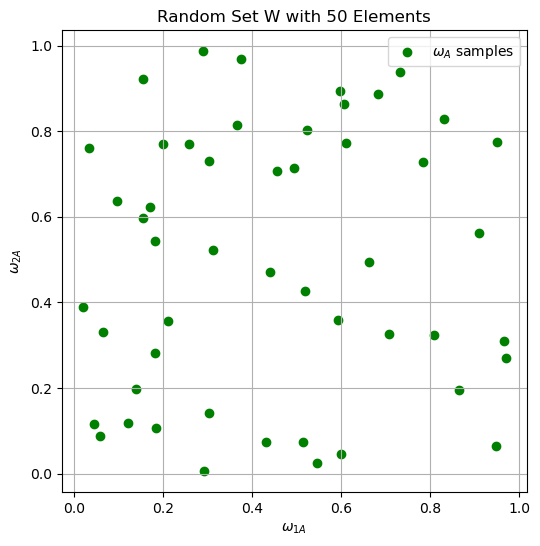

In [33]:
# Drawing a set W with 50 elements where ω1A and ω2A are uniformly distributed between 0 and 1

np.random.seed(42)  # For reproducibility

# Generating 50 samples for ω1A and ω2A
omega1A_samples = np.random.uniform(0, 1, 50)
omega2A_samples = np.random.uniform(0, 1, 50)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(omega1A_samples, omega2A_samples, color='green', label='$\omega_A$ samples')
ax.set_xlabel('$\omega_{1A}$')
ax.set_ylabel('$\omega_{2A}$')
ax.set_title('Random Set W with 50 Elements')
ax.grid(True)
ax.legend()

plt.show()


# Question 8

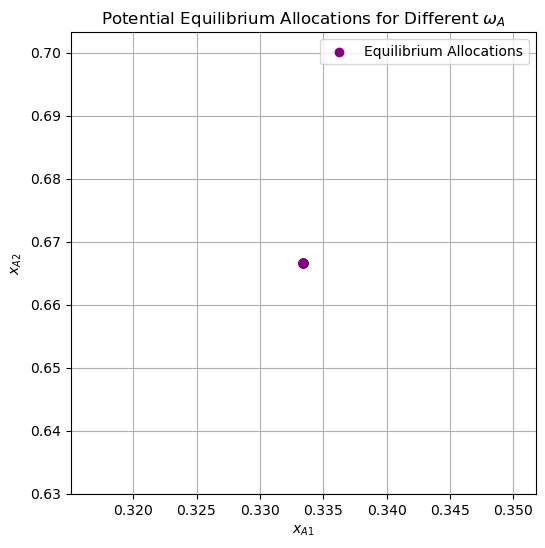

In [34]:
# Placeholder for allocations (assuming direct utility maximization without explicit market clearing)
# For demonstration, we'll use the initial utility maximization approach as an approximation

# Function to calculate allocation for given endowments
def calculate_allocation(omega1A, omega2A):
    # Adjusting the objective function for new endowments
    def objective_endowments(x):
        xA1, xA2 = x
        xB1, xB2 = 1 - xA1, 1 - xA2
        uA_val = (xA1**alpha) * (xA2**(1-alpha))
        uB_val = ((1-xA1)**beta) * ((1-xA2)**(1-beta))
        return -(uA_val + uB_val)  # Negative because we minimize
    
    # Optimization with new endowments
    result = minimize(objective_endowments, x0, bounds=bounds, method='SLSQP')
    return result.x

# Calculating allocations for each set of endowments
allocations = np.array([calculate_allocation(omega1A, omega2A) for omega1A, omega2A in zip(omega1A_samples, omega2A_samples)])

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(allocations[:, 0], allocations[:, 1], color='purple', label='Equilibrium Allocations')
ax.set_xlabel('$x_{A1}$')
ax.set_ylabel('$x_{A2}$')
ax.set_title('Potential Equilibrium Allocations for Different $\omega_A$')
ax.grid(True)
ax.legend()

plt.show()
